## TP FINAL - Stockage de donnes

Authors:  
- Yulia Kalugina
- Ricardo Vallejo      

# Python (Importation et Manipulation de données)

## 1.1. Aller sur le site data.gov https://www.data.gov/ , charger et fusionner les jeux de données
- Chicago Park District: Movies in the Parks 2015
- Chicago Park District: Movies in the Parks 2016
- Chicago Park District: Movies in the Parks 2017
### Calculer le nombre de lignes de votre table de données résultante (dataframe) (avec les fichiers fusionnés) sans et avec redondances des données (doublons s ils existent). Afficher des statistiques sur ces données. Préciser toutes les vérifications que vous avez effectuées sans faire de nettoyage sur les données.


### Chargement des jeux de donnees

In [2]:
import pandas as pd
import numpy as np
import requests

df1 = pd.read_csv("data_projet/Chicago_Park_District__Movies_in_the_Parks_2015.csv",header =0) #Reading the data from sheet cars
df1.head(2)


,EventName,MovieName,ParkName,ZipCode,Phone,StartDate,EndDate,ContactName,ContactEmail,EventUrl,ParkUrl,Community,MovieClosedCaption,MovieRating,Location 1
0,Night Out: Movies in the Parks at Lindblom,Annie (2014),Lindblom Park,60636.0,(312) 747-6443,08/06/2015 08:30:00 PM,08/06/2015 10:30:00 PM,Maceo Johnson,maceo.johnson@chicagoparkdistrict.com,http://www.chicagoparkdistrict.com/events/Nigh...,http://www.chicagoparkdistrict.com/parks/Lindb...,"Englewood, West Englewood",NaN,PG,"6054 S. Damen Ave. Chicago IL 60636\nChicago, ..."
1,Night Out: Movies in the Parks at Wicker,Night at the Museum,Wicker Park,60622.0,(312) 742-7553,06/18/2015 08:00:00 PM,06/18/2015 09:48:00 PM,"Claribel ""Clare"" Rodriguez",claribel.rodriguez@chicagoparkdistrict.com,http://www.chicagoparkdistrict.com/events/Nigh...,http://www.chicagoparkdistrict.com/parks/Wicke...,West Town,Yes,PG,1425 N. Damen Avenue Chicago IL 60622\nChicago...


In [3]:
df1.shape

(237, 15)

In [4]:
df2 = pd.read_csv("data_projet/Chicago_Park_District__Movies_in_the_Parks_2016.csv",header =0) #Reading the data from sheet cars
df2.head(2)


,EventName,MovieName,MovieClosedCaption,MovieRating,Location,Location Notes,StartDate,EndDate,Zipcode,Phone,ContactName,ContactEmail,EventUrl,ParkUrl,Location 1
0,Movies in the Parks at Rosenblum,The Color Purple,Yes,PG-13,Rosenblum Park,NaN,NaN,NaN,60649,(312) 747-7661,TBD,NaN,NaN,NaN,"7547 S. Euclid Ave.\nChicago, IL"
1,Movies in the Parks at Rutherford Sayre,Inside Out,NaN,PG,Rutherford Sayre Park,NaN,NaN,NaN,60635,(312) 746-5368,Kim Gapinski,NaN,NaN,NaN,"6871 W. Belden Ave.\nChicago, IL\n(41.921134, ..."


In [5]:
df2.shape

(243, 15)

In [6]:
df3 = pd.read_csv("data_projet/Chicago_Park_District__Movies_in_the_Parks_2017.csv",header =0) #Reading the data from sheet cars
df3.head(2)


,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Mon,08/07/2017,Oakwood Beach,(312) 742-1134,Home Alone,Y,PG,NaN,3900 S. Lake Shore Dr.,"3900 S. Lake Shore Dr.\nChicago, IL"
1,Tue,06/13/2017,Grant Park,(312) 742-3918,Jumanji,Y,PG,Underwritten by the Greater South Loop Associa...,Columbus Drive,"Columbus Drive\nChicago, IL"


In [7]:
df3.shape

(237, 10)

## Analysis preliminaire

A cause que tous les tables ont de differentes columns, mais avec information common, on dois identifier les labels que partage information differente et unifier le nom de label.  Pour faciliter le travail on enleve les espaces de nom de Labels.

### Affichage des noms de colognes

In [8]:
#df1.columns
df1.columns.sort_values()

Index([' Community', ' ContactEmail', ' ContactName', ' EndDate',
       ' EventName ', ' EventUrl', ' MovieClosedCaption', ' MovieName',
       ' MovieRating', ' ParkUrl', ' Phone', ' StartDate', ' ZipCode',
       'Location 1', 'ParkName'],
      dtype='object')

In [9]:
df2.columns.sort_values()

Index(['ContactEmail', 'ContactName', 'EndDate', 'EventName', 'EventUrl',
       'Location', 'Location 1', 'Location Notes', 'MovieClosedCaption',
       'MovieName', 'MovieRating', 'ParkUrl', 'Phone', 'StartDate', 'Zipcode'],
      dtype='object')

In [10]:
df3.columns.sort_values()

Index(['CC', 'Date', 'Day', 'Location', 'Park', 'Park Address', 'Park Phone',
       'Rating', 'Title', 'Underwriter'],
      dtype='object')

## Modification et unification de labels

In [11]:
df1.columns = df1.columns.str.replace(' ', '')  
print(df1.columns)

Index(['EventName', 'MovieName', 'ParkName', 'ZipCode', 'Phone', 'StartDate',
       'EndDate', 'ContactName', 'ContactEmail', 'EventUrl', 'ParkUrl',
       'Community', 'MovieClosedCaption', 'MovieRating', 'Location1'],
      dtype='object')


In [12]:
df2.columns = df2.columns.str.replace(' ', '') 
df2.rename(columns={   'Location':  'ParkName',
                        'Zipcode':  'ZipCode'}, inplace=True)
print(df2.columns)

Index(['EventName', 'MovieName', 'MovieClosedCaption', 'MovieRating',
       'ParkName', 'LocationNotes', 'StartDate', 'EndDate', 'ZipCode', 'Phone',
       'ContactName', 'ContactEmail', 'EventUrl', 'ParkUrl', 'Location1'],
      dtype='object')


In [13]:
df3.columns = df3.columns.str.replace(' ', '') 
df3.rename(columns={'Park'      :'ParkName',
                    'Title'     :'MovieName',
                    'CC'        :'MovieClosedCaption',
                    'ParkPhone' :'Phone',
                    'Rating'    :'MovieRating',
                    'Location'  :'Location1',
                    'Date'      :'StartDate'}, 
                     inplace=True)
 
print(df3.columns)

Index(['Day', 'StartDate', 'ParkName', 'Phone', 'MovieName',
       'MovieClosedCaption', 'MovieRating', 'Underwriter', 'ParkAddress',
       'Location1'],
      dtype='object')


In [14]:
finalColumnsx = np.concatenate((df1.columns, df2.columns, df3.columns))
finalColumns = list(set(finalColumnsx))
print(finalColumns)

['MovieClosedCaption', 'ParkAddress', 'ContactEmail', 'EndDate', 'ZipCode', 'LocationNotes', 'Location1', 'Phone', 'EventUrl', 'Day', 'MovieRating', 'ContactName', 'EventName', 'MovieName', 'StartDate', 'ParkName', 'ParkUrl', 'Underwriter', 'Community']


### Maintenant on fait la fusion avec la fonction .concat

In [15]:
FUSIONA = pd.concat([df1, df2, df3])
FUSIONA.head(3)

,EventName,MovieName,ParkName,ZipCode,Phone,StartDate,EndDate,ContactName,ContactEmail,EventUrl,ParkUrl,Community,MovieClosedCaption,MovieRating,Location1,LocationNotes,Day,Underwriter,ParkAddress
0,Night Out: Movies in the Parks at Lindblom,Annie (2014),Lindblom Park,60636.0,(312) 747-6443,08/06/2015 08:30:00 PM,08/06/2015 10:30:00 PM,Maceo Johnson,maceo.johnson@chicagoparkdistrict.com,http://www.chicagoparkdistrict.com/events/Nigh...,http://www.chicagoparkdistrict.com/parks/Lindb...,"Englewood, West Englewood",NaN,PG,"6054 S. Damen Ave. Chicago IL 60636\nChicago, ...",NaN,NaN,NaN,NaN
1,Night Out: Movies in the Parks at Wicker,Night at the Museum,Wicker Park,60622.0,(312) 742-7553,06/18/2015 08:00:00 PM,06/18/2015 09:48:00 PM,"Claribel ""Clare"" Rodriguez",claribel.rodriguez@chicagoparkdistrict.com,http://www.chicagoparkdistrict.com/events/Nigh...,http://www.chicagoparkdistrict.com/parks/Wicke...,West Town,Yes,PG,1425 N. Damen Avenue Chicago IL 60622\nChicago...,NaN,NaN,NaN,NaN
2,Night Out: Movies in the Parks at Belmont Harbor,Dial M for Murder,Lincoln Park,60614.0,(312) 742-7726,06/15/2015 08:30:00 PM,06/15/2015 10:15:00 PM,Lauren Quinn,NaN,http://www.chicagoparkdistrict.com/events/Nigh...,http://www.chicagoparkdistrict.com/parks/linco...,Lincoln Park,Yes,PG,2045 N Lincoln Park West Chicago IL 60614\nChi...,NaN,NaN,NaN,NaN


In [16]:
FUSIONA.shape

(717, 19)

### Le resultat sans doublons

In [17]:
result2 = FUSIONA.drop_duplicates()

### Affichage de dimensions de data frame resultante (sans doublons)


In [18]:
result2.shape

(717, 19)

In [19]:
result2.columns

Index(['EventName', 'MovieName', 'ParkName', 'ZipCode', 'Phone', 'StartDate',
       'EndDate', 'ContactName', 'ContactEmail', 'EventUrl', 'ParkUrl',
       'Community', 'MovieClosedCaption', 'MovieRating', 'Location1',
       'LocationNotes', 'Day', 'Underwriter', 'ParkAddress'],
      dtype='object')

In [20]:
print('Le nombre des lignes de data frame resultante', result2.shape[0])

Le nombre des lignes de data frame resultante 717


### Il y  a pas de doublons dans le data frame resultante. Le nombre des lignes avec et sans "drop_duplicates()" est pareil. Sans le nettoyage des donnees, on peut pas faire beaucoup de choses pour statistique, suelement ".shape" pour afficher les dimension de data frame.


In [21]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 236
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EventName           480 non-null    object 
 1   MovieName           717 non-null    object 
 2   ParkName            717 non-null    object 
 3   ZipCode             477 non-null    float64
 4   Phone               715 non-null    object 
 5   StartDate           474 non-null    object 
 6   EndDate             237 non-null    object 
 7   ContactName         474 non-null    object 
 8   ContactEmail        367 non-null    object 
 9   EventUrl            237 non-null    object 
 10  ParkUrl             237 non-null    object 
 11  Community           237 non-null    object 
 12  MovieClosedCaption  605 non-null    object 
 13  MovieRating         704 non-null    object 
 14  Location1           717 non-null    object 
 15  LocationNotes       33 non-null     object 
 16  Day     

## 1.2 Charger le jeu de données movies (movies.csv) dans une table de données (dataframe) et répondre aux questions suivantes
- Qui est l’acteur principal ayant été dans le film le plus couteux de la table de données? Quel est
le montant du budget de ce film?
- Quels sont les 2 films ayant eu la plus grande rentabilité de notre table de données?
- Lister des titres de films dans lesquelles ont tourné votre acteur (actrice) préféré(e)?

In [22]:
df = pd.read_csv("data_projet/movies.csv",header =0) #Chargement de donnees dans data frame df1
df.head(2)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Colores,James Cameron,723.0,178 min,0.0,855.0,Joel David Moore,1000.0,760505847 $,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,2.37e+08 $,2009.0,936,7.9 #,1.78,4834
1,Colores,Gore Verbinski,302.0,169 min,563.0,1000.0,ORLANDO BLOOM,40000.0,309404152 $,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,3e+08 $,2007.0,5000,7.1 #,2.35,48350


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      7386 non-null   object 
 1   director_name              7263 non-null   object 
 2   num_critic_for_reviews     7338 non-null   float64
 3   duration                   7410 non-null   object 
 4   director_facebook_likes    7263 non-null   float64
 5   actor_3_facebook_likes     7373 non-null   float64
 6   actor_2_name               7391 non-null   object 
 7   actor_1_facebook_likes     7400 non-null   float64
 8   gross                      7410 non-null   object 
 9   genres                     7410 non-null   object 
 10  actor_1_name               7400 non-null   object 
 11  movie_title                7410 non-null   object 
 12  num_voted_users            7410 non-null   int64  
 13  cast_total_facebook_likes  7410 non-null   int64

### 1.2.a Le film le plus couteux -> 'budget' doit etre maximale


In [24]:
df['budget'].max()

'NA $'

#### Data frame n'est pas formattee, dans le 'budget' on doit enlever 2 dernieres strings " $". Apres, on replace 'NA' par np.nan. On convert en float et cherche le max. On fait pas les modifications au tableau.

In [25]:
print('le budget maximal = ',df['budget'].str.rstrip(' $').replace('NA', np.nan).astype(float).max())

le budget maximal =  12215500000.0


In [26]:
indm=df['budget'].str.rstrip(' $').replace('NA', np.nan).astype(float).idxmax()
print('index de la valuer maximal du budget = ',indm)

index de la valuer maximal du budget =  2988


### Affichage de ligne 2988

In [27]:
df.iloc[indm]

color                                                                  Colores
director_name                                                     Joon-ho Bong
num_critic_for_reviews                                                     363
duration                                                               110 min
director_facebook_likes                                                    584
actor_3_facebook_likes                                                      74
actor_2_name                                                      KANG-HO SONG
actor_1_facebook_likes                                                     629
gross                                                                2201412 $
genres                                              Comedy|Drama|Horror|Sci-Fi
actor_1_name                                                         DOONA BAE
movie_title                                                          The Host 
num_voted_users                                     

### 1.2.b.  Comme on peut voir de le tableau, "actor_1_facebook_likes" a obtenu le plus de facebook likes (629). Donc, on a choisi "actor_1_name" comme acteur principal

In [28]:
print("l'acteur principal du film le plus couteaux:" ,df['actor_1_name'].iloc[indm])

l'acteur principal du film le plus couteaux: DOONA BAE


In [29]:
df1=df.copy()
df1['gross']=df['gross'].str.rstrip(' $').replace('NA', np.nan).astype(float)

### 1.2.c. Quels sont les 2 films ayant eu la plus grande rentabilité

In [30]:
print('les 2 films ayant eu la plus grande rentabilité:\n',df1.sort_values(by='gross',ascending=[False])['movie_title'][0:2])


les 2 films ayant eu la plus grande rentabilité:
 0      Avatar 
26    Titanic 
Name: movie_title, dtype: object


### Notre acteur prefere est Orlando Bloom. Pour eviter les repititions, on a enleve les doublicats. On cherche dans les colognes 'actor_1_name','actor_2_name','actor_3_name'. On compare les strings, donc, on a fait ces colognes upper case et enleve les espaces vides avant et apres les noms. 

In [31]:
a=['actor_1_name','actor_2_name','actor_3_name']
df2=df.drop_duplicates()

for col in list(a):
    print(df2[df2[col].str.upper().str.strip()=='ORLANDO BLOOM']['movie_title'])
    #None


339     The Lord of the Rings: The Return of the King 
896                                     Elizabethtown 
2591                                             Zulu 
Name: movie_title, dtype: object
1              Pirates of the Caribbean: At World's End 
13           Pirates of the Caribbean: Dead Man's Chest 
147                                                Troy 
205    Pirates of the Caribbean: The Curse of the Bla...
270    The Lord of the Rings: The Fellowship of the R...
275                                   Kingdom of Heaven 
340               The Lord of the Rings: The Two Towers 
Name: movie_title, dtype: object
401    The Three Musketeers 
Name: movie_title, dtype: object


## 1.3. Charger le jeu de données Film Locations in San Francisco du site data.gov https://www.data.gov/ .Transposer l’affichage de la table de données et donner le nombre et les endroits de tournage (location) par film. Créer une nouvelle table de données n’ayant que ces trois attributs et afficher les 10 premiers enregistrements:
- Titre (title)
- Release year
- Production

### Chargement de fichier csv dans la dataframe df. Affichage de 5 premieres lignes


In [32]:
df = pd.read_csv("data_projet/Film_Locations_in_San_Francisco.csv",header =0) #Chargement de donnees dans data frame df
df.head(5)


,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,Actor 3
0,180,2011,Epic Roasthouse (399 Embarcadero),NaN,SPI Cinemas,NaN,Jayendra,"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba",Siddarth,Nithya Menon,Priya Anand
1,180,2011,Mason & California Streets (Nob Hill),NaN,SPI Cinemas,NaN,Jayendra,"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba",Siddarth,Nithya Menon,Priya Anand
2,180,2011,Justin Herman Plaza,NaN,SPI Cinemas,NaN,Jayendra,"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba",Siddarth,Nithya Menon,Priya Anand
3,180,2011,200 block Market Street,NaN,SPI Cinemas,NaN,Jayendra,"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba",Siddarth,Nithya Menon,Priya Anand
4,180,2011,City Hall,NaN,SPI Cinemas,NaN,Jayendra,"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba",Siddarth,Nithya Menon,Priya Anand


In [33]:
df.shape

(3414, 11)

### Affichage de dataFrame transposee

In [34]:
df.T.head(5)

,0,1,2,3,4,5,6,7,8,9,...,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413
Title,180,180,180,180,180,180,180,180,24 Hours on Craigslist,Summertime,...,Basic Instinct,GirlBoss,Burglar,The Game,Tales of the City,Quicksilver,"Murder in the First, Season 1","Murder in the First, Season 3",George of the Jungle,Alcatraz
Release Year,2011,2011,2011,2011,2011,2011,2011,2011,2005,2015,...,1992,2017,1987,1997,2019,1986,2014,2016,1997,2012
Locations,Epic Roasthouse (399 Embarcadero),Mason & California Streets (Nob Hill),Justin Herman Plaza,200 block Market Street,City Hall,Polk & Larkin Streets,Randall Museum,555 Market St.,NaN,Alamo Square,...,Gibb Street (Chinatown),Fillmore between Haight and Waller,1400 18th Street,Merchant Exchange Building,Mission District,Pacific Stock Exchange,50 California Street,Linden Alley between Octavia and Gough Streets,755 Vallejo Street,Chestnut St. from Larkin to Columbus
Fun Facts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Production Company,SPI Cinemas,SPI Cinemas,SPI Cinemas,SPI Cinemas,SPI Cinemas,SPI Cinemas,SPI Cinemas,SPI Cinemas,Yerba Buena Productions,"Creative Monster Productions, Inc.",...,Carolco Pictures,"Hippolyta Productions, LLC",Warner Bros. Pictures,Polygram Filmed Entertainment,Universal Television LLC,Columbia Pictures Corporation,Turner North Center Productions,Turner North Center Productions,Walt Disney Pictures,Bonanza Productions Inc.


In [35]:
df.columns

Index(['Title', 'Release Year', 'Locations', 'Fun Facts', 'Production Company',
       'Distributor', 'Director', 'Writer', 'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Donner le nombre et les endroits de tournage (location) par film.


In [36]:
df['Title'].value_counts().to_frame().head(5)

,Title
Looking,82
Chance Season 2,60
The Dead Pool,58
Blue Jasmine,56
Etruscan Smile,56


### On souvegarde les valeurs unique dans une liste 


In [37]:
uniqueValues = (df['Title']).unique()
# print(uniqueValues)

In [38]:
uniqueValues.size

316

### We create an empty data frame  dfn with column names: 'Title' and'Locations'. Then, we search in  df dataframe unique values (Title) and append all the Locations corresponding to the Title to dfn dataframe.

In [39]:
dfn = pd.DataFrame(columns=['Title','Locations'])
for i in (uniqueValues):
    dfn = dfn.append({'Title':i,'Locations': df[df['Title']==i]['Locations']}, ignore_index=True)
dfn.to_csv('movies_Locations.csv', index = False)

### Example: on va meintenant afficher le nombre des tournages et tout les locations pour le deuxieme Film dans une dataframe dfn

In [40]:
k=2

print('Title :',dfn['Title'][k],'\n Nombre des tournages: ',dfn['Locations'][k].shape[0], '\n  Locations:\n',str(dfn['Locations'][k]))

Title : Summertime 
 Nombre des tournages:  28 
  Locations:
 9                                           Alamo Square 
21      Chinatown (Stockton @ Jackson & Jackson toward...
22                    Broadway and Taylor St Intersection
24      Buena Vista East & Duboce; Buena Vista East & ...
26      Love Street Vintage (1506 Haight & adjacent Ha...
27                 Montgomery between California and Pine
51      Sansome (Washington to Bush) Pine (Davis to Ke...
52                                     Stanyan & Belgrave
65                                            Duboce Park
180                     20th St and Church (3885 20th St)
187                     Turk St between Lyon and Baker St
189                                         53 Potomac St
194                         Oasis Nightclub (298 11th St)
200     Fisherman's Wharf pier near Chapel (Port Walk ...
650     Chinatown (Stockton @ Jackson & Jackson toward...
715                   Broadway and Taylor St Intersection
829     Bu

### Création de nouvelle table de données n’ayant que ces trois attributs et afficher les 10 premiers enregistrements: Title, Release Year et Production

In [41]:
df1=df[['Title','Release Year', 'Production Company']]
result = df1.drop_duplicates()
print(result.shape)
result.reset_index(inplace=True)
result_movie=result.drop('index',axis=1)

result_movie.head(10)


(319, 3)


,Title,Release Year,Production Company
0,180,2011,SPI Cinemas
1,24 Hours on Craigslist,2005,Yerba Buena Productions
2,Summertime,2015,"Creative Monster Productions, Inc."
3,Ballers Season 3,2017,"Chori Perros Productions, LLC"
4,Chance Season 2,2017,TVM Productions Inc.
5,A Night Full of Rain,1978,Liberty Film
6,Vegas in Space,1992,Troma Entertainment
7,Nine Months,1995,1492 Pictures
8,Beautiful Boy,2018,Big Indie Pictures
9,About a Boy,2014,NBC Studios


In [42]:
result_movie.to_csv('RESULT_moviesx.csv', index = False)

## 1.4. Charger le jeu de données « data_employe.profiles.txt ».
- Déterminer la classe des travailleurs qui ont un capital gain (gain capital) le plus élevé et
afficher uniquement l’âge, genre, classe de travail (class work) et le salaire ?
- Déterminer les employés qui sont susceptibles d’avoir un capital perte (capital loss) élevé
(choisir les attributs qui vous semblent pertinents pour faire cette investigation et dites
pourquoi ?
- Selon vous quelles sont les facteurs (combinaison d’attributs) ou le capital gain est au
maximum et la perte en capitale (capital loss) est au minimum avec un salaire moyen par
rapport à tous les employés ?


### Chargement de jeu de données « data_person_profiles.txt »


In [43]:
df = pd.read_csv('data_projet/data_employe_profiles.csv', delimiter=",") #Chargement de donnees dans data frame df
df.head(5)


,age,work_class,salary,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,BACHELORS,13.0,NEVER-MARRIED,Adm-clerical,Not-in-family,white,Male,2174.0,NaN,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,BACHELORS,13.0,Married-civ-spouse,Exec-managerial,husband,white,Male,NaN,NaN,13.0,United-States,<=50K
2,38,PRIvate,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,white,Male,NaN,NaN,40.0,United-States,<=50K
3,53,PRIvate,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,husband,Black,Male,NaN,NaN,40.0,United-States,<=50K
4,28,PRIvate,338409,BACHELORS,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN,NaN,40.0,Cuba,<=50K


In [44]:
df.shape

(5730, 15)

In [45]:
df.columns

Index(['age', 'work_class', 'salary', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'target'],
      dtype='object')

### 1.4.a. On cherche le 'capital_gain' moyen par classe le plus eleve.  

In [46]:
df2 = df[['age', 'gender', 'work_class', 'salary', 'capital_gain', 'gender']]
df2.groupby('work_class').mean().sort_values(by='capital_gain',ascending=False)


,age,salary,capital_gain
work_class,,,
Self-emp-inc,45.373786,172596.470874,8928.105263
PRIvate,36.586047,191583.953488,7291.619048
Self-emp-not-inc,44.890661,184634.865604,3134.097959
Private,36.981745,193673.559732,1453.709648
Local-gov,41.808511,187465.561170,1179.922330
Federal-gov,42.503030,187870.787879,1106.621053
State-gov,38.926724,179988.715517,970.074074
?,39.667568,192141.686486,642.689320
Never-worked,18.000000,206359.000000,0.000000


###  La classe de travaillurs avec le capital_gain plus eleve est "Self-emp-inc"

In [49]:
df1=df.groupby('work_class').mean().sort_values(by='capital_gain',ascending=False).head(1).idxmax()[1]
df1


'Self-emp-inc'

In [50]:
dfx = df[df.work_class == 'Self-emp-inc'][['age', 'gender', 'work_class', 'salary']]
dfx.head(5)

,age,gender,work_class,salary
54,47,Male,Self-emp-inc,109832
68,49,Male,Self-emp-inc,191681
105,32,Male,Self-emp-inc,317660
116,56,Male,Self-emp-inc,303090
140,61,Male,Self-emp-inc,66614


In [51]:
print('La classe de travail avec le capital gain le plus eleve: ',df1)
print('age moyen ',df.groupby('work_class').mean().loc['Self-emp-inc']['age'])
print('le genre plus courant: ',df[df['work_class']=='Self-emp-inc']['gender'].value_counts().idxmax())
print('le salaire moyen ',df.groupby('work_class').mean().loc['Self-emp-inc']['salary'])

La classe de travail avec le capital gain le plus eleve:  Self-emp-inc
age moyen  45.37378640776699
le genre plus courant:  Male
le salaire moyen  172596.4708737864


Pour savoir le genre le plus courant dans la class 'Self-emp-inc' on applique .value_counts().idxmax() pour les autres caracteristiques on cherche le moyenne

In [52]:
print(df[df['work_class']=='Self-emp-inc']['gender'].value_counts())

Male      177
Female     29
Name: gender, dtype: int64


In [53]:
df[df['work_class']=='Self-emp-inc']['gender'].value_counts().idxmax()

'Male'

### Déterminer les employés qui sont susceptibles d’avoir un capital perte (capital loss) élevé


In [54]:
df.sort_values(by='capital_loss',ascending=False).head(5)

,age,work_class,salary,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
5309,41,Private,70037,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0.0,3004.0,60.0,?,>50K
5713,38,Self-emp-not-inc,164526,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2824.0,45.0,United-States,>50K
2414,44,Private,326232,BACHELORS,13.0,Divorced,Exec-managerial,Unmarried,white,Male,NaN,2547.0,50.0,United-States,>50K
2859,40,Self-emp-not-inc,335549,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2444.0,45.0,United-States,>50K
387,44,Private,162028,Some-college,10.0,Married-civ-spouse,Adm-clerical,Wife,white,Female,NaN,2415.0,6.0,United-States,>50K


#### Le personnes le plus susceptible a capital perte sont dans le work_class privee et self-empl-not-inc, ils ont capital_gain=0, genre "Male" et ils sont never-married or divorced. On a choisi ces attributs parce que il sont plus courant pour les personnes concernees

### Selon vous quelles sont les facteurs (combinaison d’attributs) ou le capital gain est au maximum et la perte en capitale (capital loss) est au minimum avec un salaire moyen par rapport à tous les employés?

### On cherche les salaires qui sont plus proches a la moyenne


In [55]:
idx = np.where((df['capital_loss']==df['capital_loss'].min()) & (df['capital_gain']==df['capital_gain'].max()) & (df['salary']>0.9*df['salary'].mean())&  (df['salary']<=1.1*df['salary'].mean())) 
print(idx)

(array([3105, 3175], dtype=int64),)


In [56]:
df.loc[idx]

,age,work_class,salary,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
3105,46,Private,176814,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K
3175,36,Private,208358,Prof-school,15.0,Divorced,Prof-specialty,Not-in-family,White,Male,99999.0,0.0,45.0,United-States,>50K


In [57]:
df['age'].mean()

38.60401396160559

In [58]:
df['education_num'].mean()

10.20142774454949

In [59]:
df['salary'].mean()

190890.58411867364

In [60]:
df['hours_per_week'].mean()

40.49607261302147

### Si on regarde sur 2 ligne on peut dire que c'est un homme qui travail beaucoup (5-10 h en plus que moyen) dans le secteur prive avec l'education Prof-school  (15 points education_num ) et occupation Prof-specialty. 

### Donc, work_class, education, eduction_num, occupation et gender sont les attributs le plus important 

In [61]:
df['race'].value_counts()

White                 2582
white                 2300
Black                  576
Asian-Pac-Islander     174
Amer-Indian-Eskimo      58
Other                   40
Name: race, dtype: int64

### Je doit noter que la majorite des tout les employees sont 'white',  donc on ne peut pas dire que race est important. 

#  SQL & Python

## Running code example for SQL: 

In [63]:
import sqlite3

conn = sqlite3.connect('testYuliaRicardo_example.db')

conn.execute('''CREATE TABLE COMPANY
    (ID INT PRIMARY KEY NOT NULL,
    NAME TEXT NOT NULL,
    AGE INT NOT NULL,
    ADDRESS CHAR(50),
    SALARY REAL);''')

print("Table created successfully")
conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
VALUES (1, 'Paul', 32, 'California', 20000.00 )")

conn.commit()
cursor = conn.execute("SELECT id, name, address, salary from COMPANY")

for row in cursor:
    print ("ID = ", row[0])
    print ("NAME = ", row[1])
    print ("ADDRESS = ", row[2])
    print ("SALARY = ", row[3], "\n")

conn.close() #Run example


Table created successfully
ID =  1
NAME =  Paul
ADDRESS =  California
SALARY =  20000.0 



### Notes:
- Adding parenthesis to prints 
- Database created automatically in folder of jupyter file
- Execute 2nd time doesnt work second time because its already created the table or the database.
- To Erase database, i have to close jupyther (Windows show file already in use)

##  1.5.   Importer le jeu de données movies (movies.csv) dans une table de données qui se nommera data_movies en gardant seulement les variables suivantes :

- num_voted_users,
- country,
- movie_facebook_likes,
- director_facebook_likes,
- aspect_ratio,
- movie_title,
- actor_1_name,
- imdb_score,
- duration

Cette table de données comprendra seulement les films qui ont plus de 52000 personnes ayant voté

In [64]:
import pandas as pd

data= pd.read_csv("data_projet/movies.csv")
pd.set_option('display.max_rows', None)
data.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Colores,James Cameron,723.0,178 min,0.0,855.0,Joel David Moore,1000.0,760505847 $,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,2.37e+08 $,2009.0,936,7.9 #,1.78,4834
1,Colores,Gore Verbinski,302.0,169 min,563.0,1000.0,ORLANDO BLOOM,40000.0,309404152 $,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,3e+08 $,2007.0,5000,7.1 #,2.35,48350
2,Colores,Sam Mendes,602.0,148 min,0.0,161.0,Rory Kinnear,11000.0,200074175 $,Action|Adventure|Thriller,...,994,English,UK,PG-13,2.45e+08 $,2015.0,393,6.8 #,2.35,11700
3,Colores,Christopher Nolan,813.0,164 min,22000.0,23000.0,Christian Bale,27000.0,448130642 $,Action|Thriller,...,2701,English,USA,PG-13,2.5e+08 $,2012.0,23000,8.5 #,2.35,106759
4,NaN,Doug Walker,NaN,NA min,131.0,NaN,ROB WALKER,131.0,NA $,Documentary,...,NA,NaN,NaN,NaN,NA $,NaN,12,7.1 #,NaN,143


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      7386 non-null   object 
 1   director_name              7263 non-null   object 
 2   num_critic_for_reviews     7338 non-null   float64
 3   duration                   7410 non-null   object 
 4   director_facebook_likes    7263 non-null   float64
 5   actor_3_facebook_likes     7373 non-null   float64
 6   actor_2_name               7391 non-null   object 
 7   actor_1_facebook_likes     7400 non-null   float64
 8   gross                      7410 non-null   object 
 9   genres                     7410 non-null   object 
 10  actor_1_name               7400 non-null   object 
 11  movie_title                7410 non-null   object 
 12  num_voted_users            7410 non-null   int64  
 13  cast_total_facebook_likes  7410 non-null   int64

### Response

In [66]:
# Obtention de certaines characteristiques.

dataMovies = data [['num_voted_users','country','movie_facebook_likes','director_facebook_likes',
                    'aspect_ratio','movie_title','actor_1_name','imdb_score','duration']]

dataMovies_filtered =  dataMovies[data.num_voted_users>52000]

dataMovies_filtered.head()

,num_voted_users,country,movie_facebook_likes,director_facebook_likes,aspect_ratio,movie_title,actor_1_name,imdb_score,duration
0,886204,USA,4834,0.0,1.78,Avatar,CCH POUNDER,7.9 #,178 min
1,471220,USA,48350,563.0,2.35,Pirates of the Caribbean: At World's End,JOHNNY DEPP,7.1 #,169 min
2,275868,UK,11700,0.0,2.35,Spectre,Christoph Waltz,6.8 #,148 min
3,1144337,USA,106759,22000.0,2.35,The Dark Knight Rises,Tom Hardy,8.5 #,164 min
5,212204,USA,1873,475.0,2.35,John Carter,DARYL SABARA,6.6 #,132 min


### Verification

In [67]:
dataMovies.info() #Data not filtered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_voted_users          7410 non-null   int64  
 1   country                  7403 non-null   object 
 2   movie_facebook_likes     7410 non-null   int64  
 3   director_facebook_likes  7263 non-null   float64
 4   aspect_ratio             6944 non-null   float64
 5   movie_title              7410 non-null   object 
 6   actor_1_name             7400 non-null   object 
 7   imdb_score               7410 non-null   object 
 8   duration                 7410 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 521.1+ KB


In [68]:
dataMovies_filtered.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033 entries, 0 to 7407
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_voted_users          3033 non-null   int64  
 1   country                  3033 non-null   object 
 2   movie_facebook_likes     3033 non-null   int64  
 3   director_facebook_likes  3009 non-null   float64
 4   aspect_ratio             3033 non-null   float64
 5   movie_title              3033 non-null   object 
 6   actor_1_name             3033 non-null   object 
 7   imdb_score               3033 non-null   object 
 8   duration                 3033 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 237.0+ KB


Ilya 3033 films.

## 1.6 Créer la variable « popularite » qui prendra les valeurs suivantes :
-  Faible - Si le nombre de « Likes » sur FACEBOOK du film est en-dessous de 5000.
-  Moyenne- Si le nombre de « Likes » sur FACEBOOK du film est compris entre 5000 et 24999.
-  Forte- Si le nombre de « Likes » sur FACEBOOK du film est supérieur ou égale à 25000

### Metode 1 - np.select

In [69]:
# create a list of our conditions
#df = dataMovies
conditions = [
    (dataMovies['movie_facebook_likes'] <= 5000),
    (dataMovies['movie_facebook_likes'] > 5000) & (dataMovies['movie_facebook_likes'] <= 24999),
    (dataMovies['movie_facebook_likes'] >= 25000) 
    ]

# create a list of the values we want to assign for each condition
condition_values = ['Faible', 'Moyenne', 'Forte']

# create a new column and use np.select to assign values to it using our lists as arguments
dataMovies['popularite'] = np.select(conditions, condition_values)
dataMovies.head()
    

<ipython-input-69-295e12a84965>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMovies['popularite'] = np.select(conditions, condition_values)


,num_voted_users,country,movie_facebook_likes,director_facebook_likes,aspect_ratio,movie_title,actor_1_name,imdb_score,duration,popularite
0,886204,USA,4834,0.0,1.78,Avatar,CCH POUNDER,7.9 #,178 min,Faible
1,471220,USA,48350,563.0,2.35,Pirates of the Caribbean: At World's End,JOHNNY DEPP,7.1 #,169 min,Forte
2,275868,UK,11700,0.0,2.35,Spectre,Christoph Waltz,6.8 #,148 min,Moyenne
3,1144337,USA,106759,22000.0,2.35,The Dark Knight Rises,Tom Hardy,8.5 #,164 min,Forte
4,8,NaN,143,131.0,NaN,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,7.1 #,NA min,Faible


### Metode 2 - custom algorithme

In [76]:
populariteX = []
for row in dataMovies['movie_facebook_likes']:
    if row <= 5000 : populariteX.append('FIABLE')
    elif ((row > 5000) & (row <= 24999)): populariteX.append('MOYENNE')
    elif (row >= 25000) :  populariteX.append('FORTE')
    else: populariteX.append('Not_Rated')
        
dataMovies['popularite'] =  populariteX    



<ipython-input-76-e508149c68a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMovies['popularite'] =  populariteX


In [77]:
dataMovies.head()
    

,num_voted_users,country,movie_facebook_likes,director_facebook_likes,aspect_ratio,movie_title,actor_1_name,imdb_score,duration,popularite
0,886204,USA,4834,0.0,1.78,Avatar,CCH POUNDER,7.9 #,178 min,FIABLE
1,471220,USA,48350,563.0,2.35,Pirates of the Caribbean: At World's End,JOHNNY DEPP,7.1 #,169 min,FORTE
2,275868,UK,11700,0.0,2.35,Spectre,Christoph Waltz,6.8 #,148 min,MOYENNE
3,1144337,USA,106759,22000.0,2.35,The Dark Knight Rises,Tom Hardy,8.5 #,164 min,FORTE
4,8,NaN,143,131.0,NaN,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,7.1 #,NA min,FIABLE


### 1.7. Renommer la variable « duration » en « temps » et la variable « movie_title » en « titre »

In [78]:

dataMovies_new = dataMovies.rename(columns={'duration': 'temps', 'movie_title': 'tittre'})
dataMovies_new.head()


,num_voted_users,country,movie_facebook_likes,director_facebook_likes,aspect_ratio,tittre,actor_1_name,imdb_score,temps,popularite
0,886204,USA,4834,0.0,1.78,Avatar,CCH POUNDER,7.9 #,178 min,FIABLE
1,471220,USA,48350,563.0,2.35,Pirates of the Caribbean: At World's End,JOHNNY DEPP,7.1 #,169 min,FORTE
2,275868,UK,11700,0.0,2.35,Spectre,Christoph Waltz,6.8 #,148 min,MOYENNE
3,1144337,USA,106759,22000.0,2.35,The Dark Knight Rises,Tom Hardy,8.5 #,164 min,FORTE
4,8,NaN,143,131.0,NaN,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,7.1 #,NA min,FIABLE


# SQL & Python- Partie 2:

## 2.1. Charger les 6 fichiers (data_credit*_infos et data_credit*_socio) dans 6 tables

### data_credit_mtl_infos.xlsx

In [79]:
import pandas as pd

data1= pd.read_excel("data_projet/data_credit_mtl_infos.xlsx")
pd.set_option('display.max_rows', None)
data1.head()


,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,existing_credits,class,number_product
0,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,two,bad,5
1,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,two,bad,5
2,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,two,good,5
3,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,two,good,5
4,1215699,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,two,good,5


### data_credit_mtl_socio.xlsx

In [80]:

data2= pd.read_excel("data_projet/data_credit_mtl_socio.xlsx")
pd.set_option('display.max_rows', None)
data2.head()


,ClientID,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age
0,1218528,male single,unemployed,high qualif/self emp/mgm,yes,yes,Montreal,rent,15
1,1218459,male single,>=7,skilled,yes,yes,Montreal,rent,17
2,1218507,male single,>=7,high qualif/self emp/mgm,yes,yes,Montreal,rent,19
3,1218450,female div/dep/mar,<1,skilled,none,yes,Montreal,rent,22
4,1218360,female div/dep/mar,>=7,skilled,yes,yes,Montreal,rent,22


### data_credit_que_infos.xlsx

In [81]:
data3= pd.read_excel("data_projet/data_credit_que_infos.xlsx")
pd.set_option('display.max_rows', None)
data3.head()


,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,existing_credits,class,number_product
0,1216377,<0,1_2_years,existing paid,new car,1000_2000,<100,none,life insurance,none,one,bad,5
1,1216371,<0,1_2_years,delayed previously,radio/tv,1000_2000,<100,none,car,none,one,bad,5
2,1216380,no checking,lo_1_year,delayed previously,used car,1000_2000,<100,none,real estate,none,one,good,2
3,1216374,no checking,lo_1_year,existing paid,new car,1000_2000,100<=X<500,none,real estate,none,one,good,6
4,1216104,0<=X<200,lo_1_year,delayed previously,furniture/equipment,1000_2000,<100,none,life insurance,stores,two,good,3


### data_credit_que_socio.xlsx

In [82]:
data4 = pd.read_excel("data_projet/data_credit_que_socio.xlsx")
pd.set_option('display.max_rows', None)
data4.head()




,ClientID,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age
0,1216377,female div/dep/mar,<1,skilled,none,yes,Quebec,rent,25
1,1216371,female div/dep/mar,<1,unskilled resident,yes,yes,Quebec,rent,28
2,1216380,male mar/wid,1<=X<4,skilled,none,yes,Quebec,rent,29
3,1216374,male single,1<=X<4,unskilled resident,none,no,Quebec,rent,29
4,1216104,male single,unemployed,high qualif/self emp/mgm,yes,yes,Quebec,own,33


### data_credit_tor_infos.xlsx

In [83]:
data5= pd.read_excel("data_projet/data_credit_tor_infos.xlsx")
pd.set_option('display.max_rows', None)
data5.head()


,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,existing_credits,class,number_product
0,1216830,<0,1_2_years,delayed previously,new car,up_2000,<100,none,no known property,none,two,bad,3
1,1217052,<0,1_2_years,existing paid,used car,up_2000,<100,none,no known property,none,one,good,4
2,1216386,<0,1_2_years,all paid,radio/tv,1000_2000,<100,guarantor,car,bank,one,bad,6
3,1216836,0<=X<200,1_2_years,existing paid,used car,up_2000,<100,none,no known property,none,one,bad,7
4,1216902,0<=X<200,up_2_years,existing paid,other,up_2000,no known savings,none,no known property,bank,one,good,1


### data_credit_tor_socio.xlsx

In [84]:
data6= pd.read_excel("data_projet/data_credit_tor_socio.xlsx")
pd.set_option('display.max_rows', None)
data6.head()

,ClientID,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age
0,1216830,male single,1<=X<4,skilled,none,yes,Toronto,for free,15
1,1217052,male single,unemployed,high qualif/self emp/mgm,yes,yes,Toronto,for free,15
2,1216386,male single,4<=X<7,unskilled resident,none,yes,Toronto,rent,15
3,1216836,female div/dep/mar,>=7,high qualif/self emp/mgm,yes,yes,Toronto,for free,15
4,1216902,male single,unemployed,unemp/unskilled non res,yes,yes,Toronto,for free,16


## 2.2.  Fusionner les de façon à avoir toutes ces données toutes ensembles dans une table de base de données. Cette nouvelle table a comme nom data_credit
Aucun enregistrement (donnée) provenant des fichiers ne doit être perdu lors de la fusion et assurer qu'il
n'y a aucun doublon dans cette nouvelle table (par doublons, nous voulons dire qu'aucune ligne de données
ne se retrouve plus d'une fois dans la nouvelle table) ?

## Analysis preliminaire:

- On a besoin de preserver tous les donnes, effacer pas de variables et conserver la structuture adequate pour profiter
de la functionalite de pandas dataframes.

- Les 6 tables de data sont de 2 types:
    - Information general socio.
    - Information credit socio.
    
- Ilya deux champs importantes pour la fussion, City pour identifier le set de donnes et ClientId pour indexer des donnes.
- Les donnes ont de deux types: **DATACREDIT et DATAINFOUSER**
- Le numero de set de donnes est 3, **MONTREAL, TORONTO, QUEBEC**
- Chaque set de donnes est composse de deux fichiers chaque excell.

- Selon l'information generale de datasets:
    - On a pas des valeurs null comme valeurs des donnes des datasets.
    - On va reduire les donnes a un dataset de 21 labels.
  
- Pour chaque Ville ou set donnes on va faire un **fusion preliminaire** de donnes de credit et info general basse sur le **ClientId**. 

- La image suivant explique le methodologie de fussion.

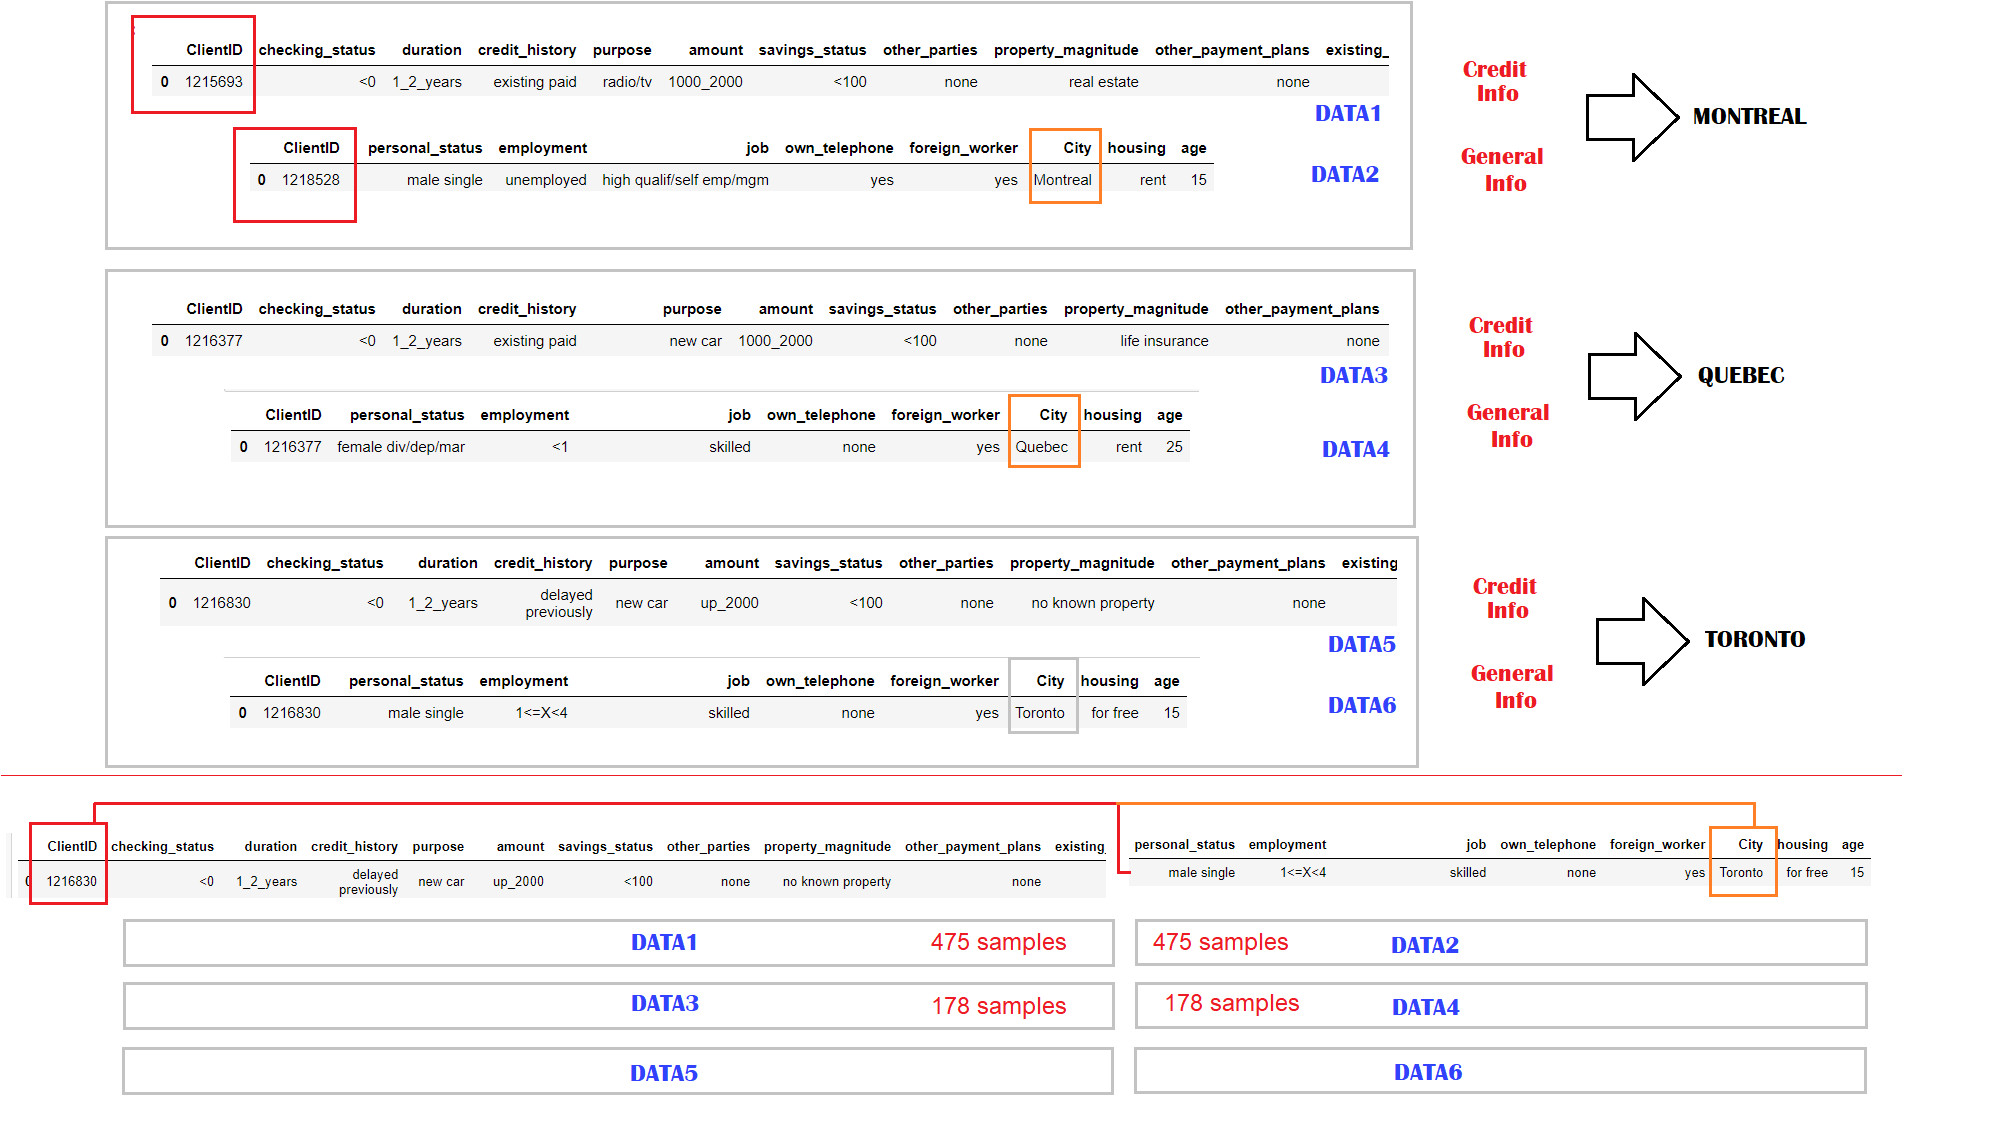

In [85]:
from IPython.display import Image
Image(filename = "data_projet/strategieFusionData.png", width = 1600, height = 1200)


In [86]:
# Numero de columns dataset resultat

ncols_merged = data1.shape[1] + data2.shape[1] - 1 #No repeter clientId
print("No. Columns merged dataSet: ", ncols_merged)

No. Columns merged dataSet:  21


In [87]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ClientID             475 non-null    int64 
 1   checking_status      475 non-null    object
 2   duration             475 non-null    object
 3   credit_history       475 non-null    object
 4   purpose              475 non-null    object
 5   amount               475 non-null    object
 6   savings_status       475 non-null    object
 7   other_parties        475 non-null    object
 8   property_magnitude   475 non-null    object
 9   other_payment_plans  475 non-null    object
 10  existing_credits     475 non-null    object
 11  class                475 non-null    object
 12  number_product       475 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 48.4+ KB


In [88]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ClientID         475 non-null    int64 
 1   personal_status  475 non-null    object
 2   employment       475 non-null    object
 3   job              475 non-null    object
 4   own_telephone    475 non-null    object
 5   foreign_worker   475 non-null    object
 6   City             475 non-null    object
 7   housing          475 non-null    object
 8   age              475 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 33.5+ KB


## Analysis de relation entre tables - ClientID

- Dans les tables de type DATACREDIT (Data 1,3,5) on repete des ClientIDs, apres de explorer les donnes on arrive a la conclusion que pour les cases ou les socios sont enregistres plus d'une fois, sont des doublons, mais pas tout les socios sont en doublon.

- On va enlever les donnes doublons sur tables DATA 1,3,5 avant le merge preliminaire

In [89]:
data1['ClientID'].count()

475

In [90]:
data1['ClientID'].nunique()

241

In [91]:
data1.sort_values('ClientID').head(6)

,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,existing_credits,class,number_product
0,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,two,bad,5
1,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,two,bad,5
2,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,two,good,5
3,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,two,good,5
4,1215699,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,two,good,5
5,1215699,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,two,good,5


- Dans les tables de type DATAINFOUSER on repete les ClientIDs, donc ilya une plus de une credit pour usager, 
il faut tenir en compte un relation many to many or one to many entre les deux tables.

- On va enlever les donnes doublons sur tables DATA 2,4,6 avant de merge preliminaire


In [92]:
data2['ClientID'].count() # Numero de ClientIDs des clients dans le dataset

475

In [93]:
data2['ClientID'].nunique() # Numero de ClientIDs uniques dans le dataset

241

In [94]:
data2.sort_values('ClientID').head(10) # Pour regarder les valeurs repetetitives.

,ClientID,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age
375,1215693,female div/dep/mar,1<=X<4,skilled,yes,yes,Montreal,own,49
134,1215693,female div/dep/mar,1<=X<4,skilled,yes,yes,Montreal,own,49
355,1215696,male single,unemployed,high qualif/self emp/mgm,yes,yes,Montreal,own,46
114,1215696,male single,unemployed,high qualif/self emp/mgm,yes,yes,Montreal,own,46
376,1215699,female div/dep/mar,>=7,skilled,yes,yes,Montreal,own,49
135,1215699,female div/dep/mar,>=7,skilled,yes,yes,Montreal,own,49
51,1215702,male single,>=7,skilled,none,yes,Montreal,own,35
292,1215702,male single,>=7,skilled,none,yes,Montreal,own,35
397,1215705,male single,1<=X<4,skilled,yes,no,Montreal,own,52
156,1215705,male single,1<=X<4,skilled,yes,no,Montreal,own,52


In [95]:
# All the ClientIDs of DATA1 are in DATA2, in order to evaluate if the inner join its valid. 

In [96]:
res = data1.isin(data2['ClientID']).any().any()
print(res)

True


### Procedure de fussion:

In [97]:
DATACLIENTS = pd.concat([data1, data3, data5]).drop_duplicates()
DATACLIENTS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 600
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ClientID             946 non-null    int64 
 1   checking_status      946 non-null    object
 2   duration             946 non-null    object
 3   credit_history       946 non-null    object
 4   purpose              946 non-null    object
 5   amount               946 non-null    object
 6   savings_status       946 non-null    object
 7   other_parties        946 non-null    object
 8   property_magnitude   946 non-null    object
 9   other_payment_plans  946 non-null    object
 10  existing_credits     946 non-null    object
 11  class                946 non-null    object
 12  number_product       946 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 103.5+ KB


In [98]:
DATACREDITS = pd.concat([data2, data4, data6]).drop_duplicates()
DATACREDITS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 600
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ClientID         946 non-null    int64 
 1   personal_status  946 non-null    object
 2   employment       946 non-null    object
 3   job              946 non-null    object
 4   own_telephone    946 non-null    object
 5   foreign_worker   946 non-null    object
 6   City             946 non-null    object
 7   housing          946 non-null    object
 8   age              946 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 73.9+ KB


In [99]:
FUSION = pd.merge(DATACLIENTS, DATACREDITS, on=["ClientID"], how = 'inner') 
FUSION.sort_values('ClientID').head()


,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,...,class,number_product,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age
0,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,...,bad,5,female div/dep/mar,1<=X<4,skilled,yes,yes,Montreal,own,49
1,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,...,good,5,male single,unemployed,high qualif/self emp/mgm,yes,yes,Montreal,own,46
2,1215699,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,...,good,5,female div/dep/mar,>=7,skilled,yes,yes,Montreal,own,49
3,1215702,no checking,1_2_years,critical/other existing,radio/tv,1000_2000,>=1000,none,car,none,...,good,5,male single,>=7,skilled,none,yes,Montreal,own,35
4,1215705,no checking,lo_1_year,existing paid,radio/tv,1000_2000,<100,none,life insurance,none,...,good,5,male single,1<=X<4,skilled,yes,no,Montreal,own,52


In [100]:
FUSION.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ClientID             946 non-null    int64 
 1   checking_status      946 non-null    object
 2   duration             946 non-null    object
 3   credit_history       946 non-null    object
 4   purpose              946 non-null    object
 5   amount               946 non-null    object
 6   savings_status       946 non-null    object
 7   other_parties        946 non-null    object
 8   property_magnitude   946 non-null    object
 9   other_payment_plans  946 non-null    object
 10  existing_credits     946 non-null    object
 11  class                946 non-null    object
 12  number_product       946 non-null    int64 
 13  personal_status      946 non-null    object
 14  employment           946 non-null    object
 15  job                  946 non-null    object
 16  own_tele

## 2.3. Afficher le nombre de clients qu'il y a dans la région de Toronto et après de Québec ainsi que l'âge moyen des clients de chaque région ?

In [101]:
respTor = FUSION[FUSION.City=="Toronto"]
print("nombre de clients qu'il y a dans la région de Toronto: ", respTor.shape[0])

respQc = FUSION[FUSION.City=="Quebec"]
print("nombre de clients qu'il y a dans la région de Quebec: ", respQc.shape[0])

respMtl = FUSION[FUSION.City=="Montreal"]
print("nombre de clients qu'il y a dans la région de Montreal: ", respMtl.shape[0])

nombre de clients qu'il y a dans la région de Toronto:  582
nombre de clients qu'il y a dans la région de Quebec:  104
nombre de clients qu'il y a dans la région de Montreal:  241


In [102]:
FUSION.groupby('City').size().to_frame()

,0
City,
Montreal,241
Quebec,104
Toronto,582
Totonto,19


- Ca dois etre corrige l'erreur de typo "Totonto" dans les donnes, en total Toronto 582 + 19 = 601
- **On le fait pas la modification pour respecter les donnes original dans l'analysis de projet**

In [103]:
print("Age moyene Toronto", respTor['age'].mean())

Age moyene Toronto 42.94329896907217


### Age moyenne pour chaque region

In [104]:
FUSION.groupby('City').mean()['age'].to_frame()

,age
City,
Montreal,47.742739
Quebec,55.317308
Toronto,42.943299
Totonto,46.947368


## 2.4. Dans cette nouvelle table, veuillez afficher le nombre de produits moyen, le minimum du nombre de produit, le maximum du nombre de produits et cela grouper par ville. Nous voulons seulement la ville de Montréal et de Québec. Quelle est la ville qui a la plus petite moyenne ? Est-ce une grande différence?

In [105]:
f2 = FUSION[(FUSION.City == "Montreal") | (FUSION.City == "Quebec")]
f2.groupby('City').describe()['number_product']

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Montreal,241.0,5.049793,1.164407,1.0,5.0,5.0,5.0,12.0
Quebec,104.0,4.942308,2.198088,1.0,3.0,5.0,6.0,12.0


La Ville avec plut petite moyenne cest Quebec, et il n'as pas bcp de difference.

In [106]:
difference = FUSION[(FUSION.City == "Montreal")].mean()['number_product'] - FUSION[(FUSION.City == "Quebec")].mean()['number_product']
print("Differences entre moyennes number_product de Montreal et Quebec: ", difference)

Differences entre moyennes number_product de Montreal et Quebec:  0.10748483881263926


## 2.5. Créer deux nouvelles variables pour grouper la variable « âge » avec un pas de 5 et après un pas de 10 en commençant par la valeur 10 (des groupes 10-15 pour les pas de 5) et (des groupes 10-20 pour les  pas de 10, etc.) jusqu’à atteindre l’âge maximum de la table de données. Vous nommerez ces variables «age_group_5 et age_group_10 » (4 requêtes maximum).

In [107]:
FUSION['age'].describe()

count    946.000000
mean      45.606765
std       13.585150
min       15.000000
25%       37.000000
50%       46.000000
75%       53.000000
max       79.000000
Name: age, dtype: float64

### Version 1.

In [108]:
bins5 = np.arange(start=10, stop=100, step=5)
print(bins5)
print("No de bins de 5: ", len(bins5))
labels5 = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40','41-45', '46-50','51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95']
print("No de labels de 5: ", len(labels5))

FUSION['age_group_5']  =  pd.cut(FUSION['age'], bins5, labels = labels5, include_lowest = True)


bins10 = np.arange(start=10, stop=100, step=10)
print(bins10)
print("No de bins de 10: ", len(bins5))
labels10 = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90']
print("No de labels de 10: ", len(labels5))

FUSION['age_group_10']  =  pd.cut(FUSION['age'], bins10, labels = labels10, include_lowest = True)
FUSION.head(10)


[10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
No de bins de 5:  18
No de labels de 5:  17
[10 20 30 40 50 60 70 80 90]
No de bins de 10:  18
No de labels de 10:  17


,ClientID,checking_status,duration,credit_history,purpose,amount,savings_status,other_parties,property_magnitude,other_payment_plans,...,personal_status,employment,job,own_telephone,foreign_worker,City,housing,age,age_group_5,age_group_10
0,1215693,<0,1_2_years,existing paid,radio/tv,1000_2000,<100,none,real estate,none,...,female div/dep/mar,1<=X<4,skilled,yes,yes,Montreal,own,49,46-50,41-50
1,1215696,0<=X<200,lo_1_year,critical/other existing,used car,1000_2000,<100,none,car,none,...,male single,unemployed,high qualif/self emp/mgm,yes,yes,Montreal,own,46,46-50,41-50
2,1215699,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,...,female div/dep/mar,>=7,skilled,yes,yes,Montreal,own,49,46-50,41-50
3,1215702,no checking,1_2_years,critical/other existing,radio/tv,1000_2000,>=1000,none,car,none,...,male single,>=7,skilled,none,yes,Montreal,own,35,31-35,31-40
4,1215705,no checking,lo_1_year,existing paid,radio/tv,1000_2000,<100,none,life insurance,none,...,male single,1<=X<4,skilled,yes,no,Montreal,own,52,51-55,51-60
5,1215708,<0,lo_1_year,critical/other existing,repairs,1000_2000,100<=X<500,guarantor,real estate,none,...,male single,>=7,skilled,none,no,Montreal,own,38,36-40,31-40
6,1215711,no checking,lo_1_year,critical/other existing,radio/tv,1000_2000,no known savings,none,real estate,none,...,male single,1<=X<4,unskilled resident,none,yes,Montreal,own,58,56-60,51-60
7,1215714,no checking,1_2_years,critical/other existing,new car,1000_2000,<100,none,life insurance,none,...,female div/dep/mar,<1,skilled,none,yes,Montreal,own,51,51-55,51-60
8,1215717,no checking,1_2_years,existing paid,domestic appliance,1000_2000,500<=X<1000,none,life insurance,none,...,male single,4<=X<7,skilled,yes,yes,Montreal,own,54,51-55,51-60
9,1215720,<0,1_2_years,existing paid,furniture/equipment,1000_2000,<100,none,car,none,...,female div/dep/mar,unemployed,skilled,none,yes,Montreal,own,39,36-40,31-40


### Version 2

In [109]:
def age_gr10(x): 
    if   x < 20: return '10-19'
    elif x < 30: return '20-29'
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x < 80: return '70-79'
    elif x <=90: return '80-90'
    else: return 'other'
    
    
def age_gr5(x): 
    if   x < 10: return '<10'
    elif x < 15: return '10-14'
    elif x < 20: return '15-19'
    elif x < 25: return '20-24' 
    elif x < 30: return '25-29' 
    elif x < 35: return '30-34' 
    elif x < 40: return '35-39' 
    elif x < 45: return '40-44'
    elif x < 50: return '45-49'
    elif x < 55: return '50-54' 
    elif x < 60: return '55-59' 
    elif x < 65: return '60-64' 
    elif x < 70: return '65-69'
    elif x < 75: return '70-74' 
    elif x < 80: return '75-79' 
    elif x < 85: return '80-84' 
    elif x < 90: return '85-89'     
    else: return 'other'
    
    
    
#FUSION['age_group_10'] = FUSION.age.apply(age_gr10)
#FUSION['age_group_5']  = FUSION.age.apply(age_gr5)
#FUSION.head(2)

## 2.6. Afficher la proportion totale de clients qui possèdent soit un mauvais crédit ou un bon crédit. Quelle est la catégorie où il l’y a le plus de mauvais crédit ?

In [110]:
FUSION.groupby(['other_parties', 'class'])['ClientID'].count().to_frame() #nested Groupby Housing -- Categorie assumed

ClientID
other_parties class          
co applicant  bad          18
              good         22
guarantor     bad          10
              good         39
none          bad         255
              good        602

#### La categorie avec le plus mauvaise credit est pour les socios lequelles ont pas ni guarantor ni co applicant. 

## 2.7. Y a-t-il une préférence par territoire pour ce qui est des montants prêtés à la clientèle. Pour cela, vous devez exclure les personnes ayant entre 10 et 24 ans et les personnes de plus de 70 ans. Veuillez ordonner (ordre décroissant) cette sortie par le nombre de clients qu'il y a dans chacun des groupes

In [111]:
#Filtrer les donnees
subFusion = FUSION[(FUSION.age < 10) | ((FUSION.age > 24) & (FUSION.age < 70)) ]
subFusion.groupby(['City', 'amount'])['ClientID'].count().sort_values(ascending=False).to_frame()

ClientID
City     amount             
Toronto  up_2000         371
Montreal 1000_2000       107
         up_2000         105
Toronto  lo_1000         103
Quebec   1000_2000        90
Toronto  1000_2000        27
Totonto  1000_2000        19

#### Oui, il y a une preference. Par exemple, a Toronto la preference pour les montantes pretes a la clientele :  2000+ CAD. A Montreal les pretes 1000-2000 CAD et 2000+ CAD sont egales (en preference), parcontre il y a pas des pretes de <1000 CAD. A Quebec il y a que des pretes de 1000-2000 CAD.

# THE END